### transposon_mapping.py calling 
### clean_bedwigfiles.py (to clean the bed and wig files).

### transposonread_profileplot_genome.py (to check the insertion and read distribution throughout the genome).

### transposonread_profileplot.py (to check the insertions and read distribution per chromosome in more detail).

### scatterplot_genes.py (to check the distribution for the number of insertions per gene and per essential gene).

### volcanoplot.py (only when comparing multiple datasets with different genetic backgrounds to see which genes have a significant change in insertion and read counts).

In [4]:

import os, sys
import warnings
import timeit
import numpy as np
import pysam

#### Importing specific functions inside the python modules folder
dirname = os.path.dirname(os.path.abspath('__file__'))
sys.path.insert(1,os.path.join(dirname,'..','python_scripts','python_modules'))

from chromosome_names_in_files import chromosome_name_bedfile, chromosome_name_wigfile
from chromosome_and_gene_positions import chromosome_position, chromosomename_roman_to_arabic, gene_position
from essential_genes_names import list_known_essentials
from gene_names import list_gene_names, gene_aliases
from read_sgdfeatures import sgd_features







In [4]:
dirname = os.path.dirname(os.path.abspath('__file__'))
sys.path.insert(1,os.path.join(dirname,'..','python_transposonmapping'))
from transposonmapping_satay import transposonmapper

transposonmapper(bamfile=None) ## if it is run  in spyder it wont complain ....
## the output are wig, bed , and txt files with the the number of reads per transposon per gene 

KeyError: 17

### Clean the wig and bed files generated by transposon mapper (it is ok if run in spyder)

In [3]:
## clean wig files for proper visualization in the genome Browser http://genome-euro.ucsc.edu/cgi-bin/hgGateway
# importing libraries 
sys.path.insert(1,os.path.join(dirname,'..','python_scripts'))
from clean_bedwigfiles import cleanfiles
# calling the function

filepath_wig = r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.wig"
filepath_bed = r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.bed"
custom_header = ""
split_chromosomes = False
cleanfiles(filepath=filepath_wig, custom_header=custom_header, split_chromosomes=split_chromosomes)
cleanfiles(filepath=filepath_bed, custom_header=custom_header, split_chromosomes=split_chromosomes)


Wig file loaded ../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.wig
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
Line removed: 1531934 14

evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XIII
evaluating chromosome XIV
evaluating chromosome XV
evaluating chromosome XVI
Bed file loaded ../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam.bed
evaluating chromosome I
evaluating chromosome II
evaluating chromosome III
evaluating chromosome IV
Line removed: chrref|NC_001136| 1531934 1531935 . 380

evaluating chromosome V
evaluating chromosome VI
evaluating chromosome VII
evaluating chromosome VIII
evaluating chromosome IX
evaluating chromosome X
evaluating chromosome XI
evaluating chromosome XII
evaluating chromosome XII

Genome length:  12071326
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt


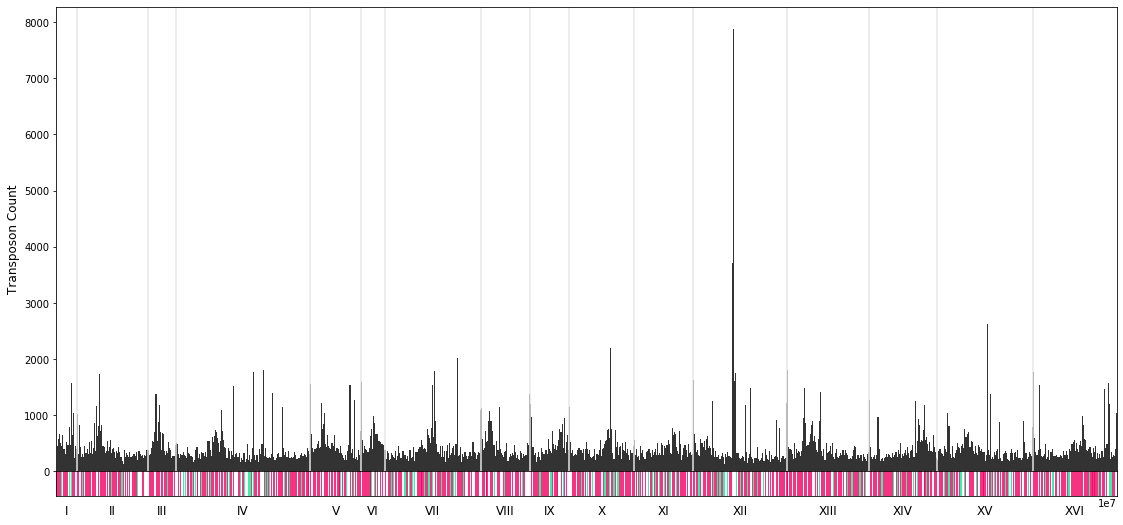

In [7]:
#transposonread_profileplot_genome.py (to check the insertion and read distribution throughout the genome)
sys.path.insert(1,os.path.join(dirname,'..','python_scripts'))
from transposonread_profileplot_genome import profile_genome

bed_file=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.bed"
variable="transposons" #"reads" "transposons"
bar_width=None
savefig=False

profile_genome(bed_file=bed_file, variable=variable, bar_width=bar_width, savefig=savefig)


Chromosome length:  230218
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt
Plotting chromosome  I ...
bar width for plotting is  287


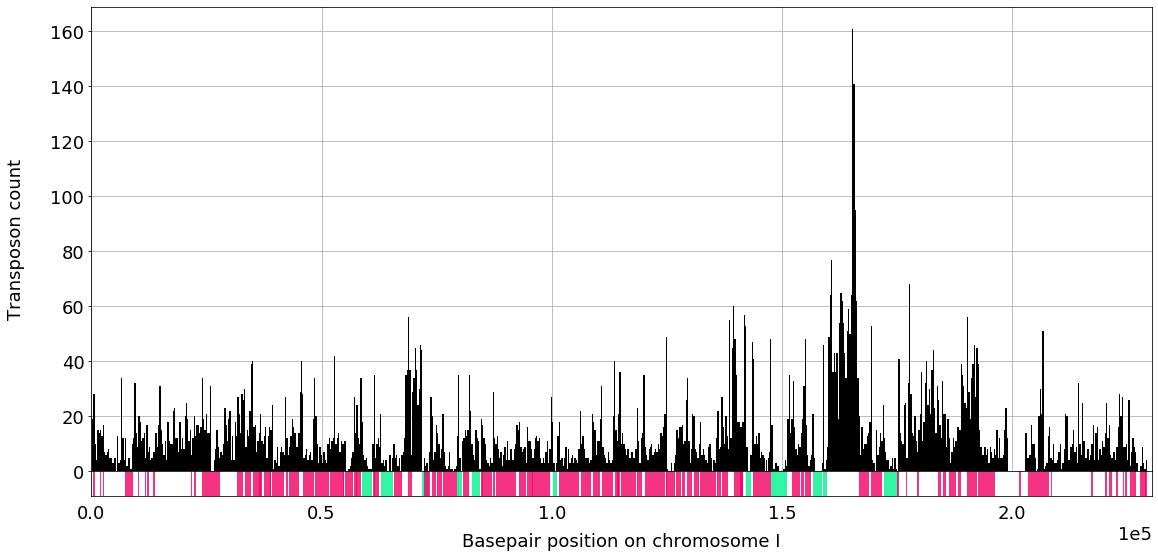

In [9]:
# transposonread_profileplot.py (to check the insertions and read distribution per chromosome in more detail).
sys.path.insert(1,os.path.join(dirname,'..','python_scripts'))
from transposonread_profileplot import profile_plot

bed_file=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.bed"
variable="transposons" #"reads" "transposons"
chrom="I"
bar_width=None
savefig=False

profile_plot(bed_file=bed_file, variable=variable, chrom=chrom, bar_width=bar_width, savefig=savefig)

Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_1.txt
Reading file : /data/localhome/linigodelacruz/Documents/PhD_2018/Documentation/SATAY/src(source-code)/LaanLab-SATAY-DataAnalysis/notebooks/../data_files/Cerevisiae_EssentialGenes_List_2.txt


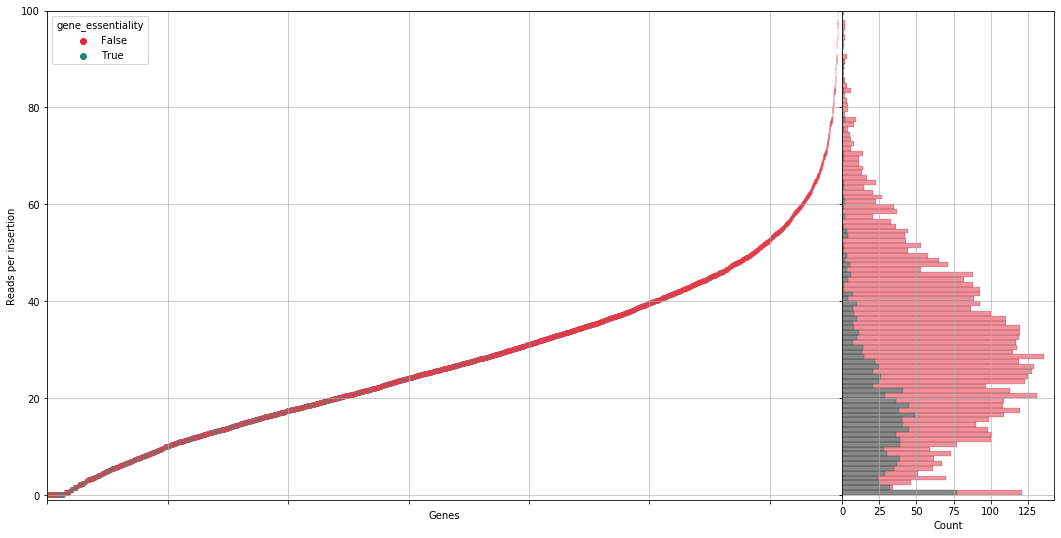

In [3]:
#scatterplot_genes.py (to check the distribution for the number of insertions per gene and per essential gene).
sys.path.insert(1,os.path.join(dirname,'..','python_scripts'))
from scatterplot_genes import scatterplot

pergenefile=r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene.txt"

read_gene_df = scatterplot(pergenefile)

Selected region:  1
Chromosome length =  230218


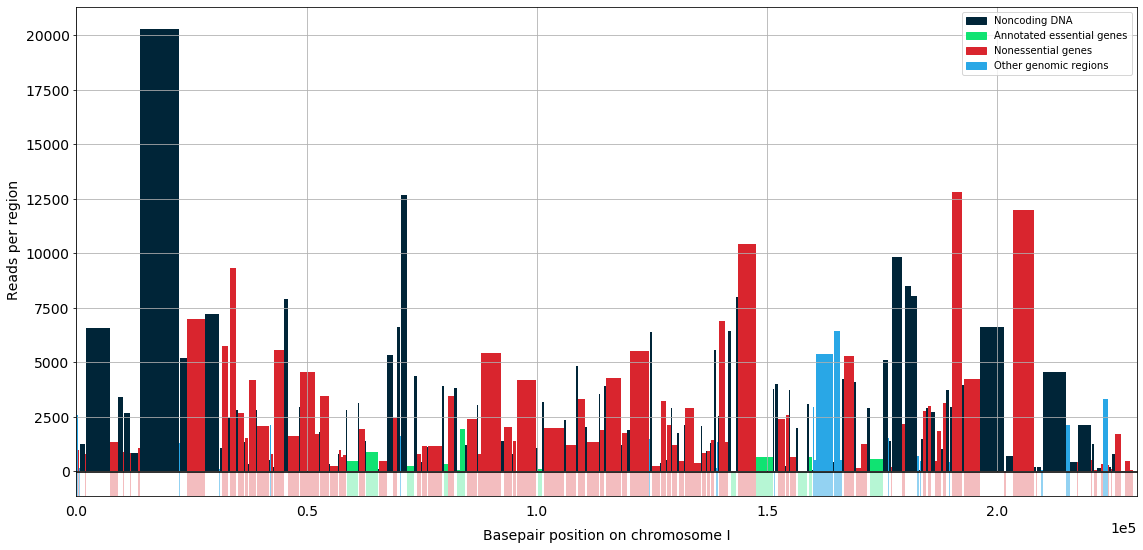

In [7]:
# genomic features 

sys.path.insert(1,os.path.join(dirname,'..','python_scripts'))
from genomicfeatures_dataframe import dna_features

region = 1 #e.g. 1, "I", ["I", 0, 10000"], gene name (e.g. "CDC42")
wig_file = r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_clean.wig"
pergene_insertions_file = r"../data_files/data_merged_wt/WT_merged-DpnII-NlaIII-a_trimmed.sorted.bam_pergene_insertions.txt"
plotting=True
variable="reads" #"reads" or "insertions"
savefigure=False
verbose=True

dna_df2 = dna_features(region=region,
                 wig_file=wig_file,
                 pergene_insertions_file=pergene_insertions_file,
                 variable=variable,
                 plotting=plotting,
                 savefigure=savefigure,
                 verbose=verbose)